# <font color="red">B0:Cài đặt thư viện và import </font>
- pip install pandas <br>
- pip install numpy <br>
- pip install matplotlib <br>
- pip install scikit-learn (sklearn) <br>
- pip install pickle (nếu lỗi version thì pip install pickle5) <br>
- pip install yfinance (data về chứng khoán) <br>

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# <font color="red">B1:Đọc DATA và khám phá dữ liệu ( Công ty Apple) </font>

In [2]:
# Ticker symbol của cổ phiếu bạn muốn dự đoán
ticker_symbol = 'AAPL'

# Lấy dữ liệu lịch sử giá cổ phiếu
stock_data = yf.download(ticker_symbol, start='2003-10-20', end='2023-10-20')


[*********************100%%**********************]  1 of 1 completed


In [3]:
stock_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-10-20,0.403571,0.416786,0.399643,0.414643,0.351484,279132000
2003-10-21,0.416250,0.417857,0.406250,0.413929,0.350879,176461600
2003-10-22,0.409643,0.414286,0.405000,0.406429,0.344522,161599200
2003-10-23,0.405893,0.413393,0.403393,0.410536,0.348003,165211200
2003-10-24,0.402857,0.408036,0.396964,0.403571,0.342099,219856000
...,...,...,...,...,...,...
2023-10-13,181.419998,181.929993,178.139999,178.850006,178.614685,51427100
2023-10-16,176.750000,179.080002,176.509995,178.720001,178.484863,52517000
2023-10-17,176.649994,178.419998,174.800003,177.149994,176.916916,57549400


In [4]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5035 entries, 2003-10-20 to 2023-10-19
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5035 non-null   float64
 1   High       5035 non-null   float64
 2   Low        5035 non-null   float64
 3   Close      5035 non-null   float64
 4   Adj Close  5035 non-null   float64
 5   Volume     5035 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 275.4 KB


In [5]:
stock_data.keys()
# Những feature của tập dữ liệu

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [6]:
stock_data.describe()
# Thống kê mô tả về tập dữ liệu

,Open,High,Low,Close,Adj Close,Volume
count,5035.000000,5035.000000,5035.000000,5035.000000,5035.000000,5.035000e+03
mean,41.064532,41.517863,40.628309,41.090829,39.537489,4.090240e+08
std,51.311743,51.904384,50.764408,51.358526,51.267895,3.956596e+08
min,0.350893,0.355179,0.343750,0.351786,0.298202,3.145820e+07
25%,5.408036,5.499821,5.311250,5.435714,4.607744,1.151032e+08
50%,20.644644,20.922501,20.425714,20.718929,17.715296,2.754264e+08
75%,46.801250,47.198750,46.445000,46.817499,44.814848,5.759642e+08
max,196.240005,198.229996,195.279999,196.449997,195.926956,3.372970e+09


# <font color="red">B2:Kiểm tra và tiền xử lý dữ liệu(nếu có) </font>

In [7]:
stock_data.shape
# kích thước dữ liệu

(5035, 6)

In [8]:
stock_data.dtypes
#Kiểu dữ liệu của từng feature

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [9]:
stock_data.isnull().sum()
#check missing value

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### <font color = 'yellow' >Ta thấy tập dữ liệu này khá là sạch<font>

In [10]:
# Chọn cột 'Adj Close' (giá đóng cửa đã điều chỉnh) làm biến phụ thuộc (y)
y = stock_data['Adj Close']
y

Date
2003-10-20      0.351484
2003-10-21      0.350879
2003-10-22      0.344522
2003-10-23      0.348003
2003-10-24      0.342099
                 ...    
2023-10-13    178.614685
2023-10-16    178.484863
2023-10-17    176.916916
2023-10-18    175.608643
2023-10-19    175.229156
Name: Adj Close, Length: 5035, dtype: float64

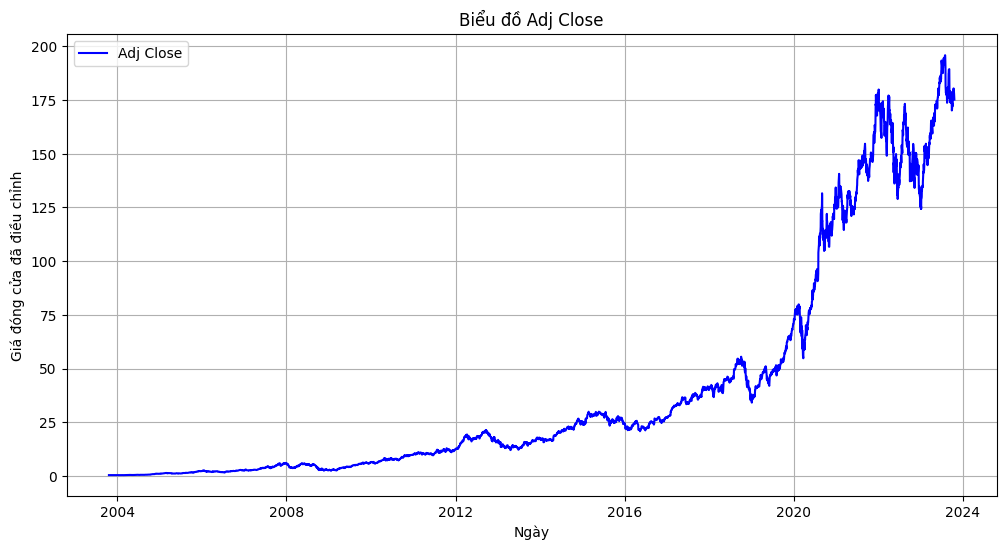

In [11]:
# Vẽ biểu đồ đường cho cột 'Adj Close'
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, y, label='Adj Close', color='blue')
plt.title('Biểu đồ Adj Close')
plt.xlabel('Ngày')
plt.ylabel('Giá đóng cửa đã điều chỉnh')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
# Chọn các cột trừ cột 'Adj Close' làm biến độc lập (x)
X = stock_data.drop(columns=['Adj Close'])
X

,Open,High,Low,Close,Volume
Date,,,,,
2003-10-20,0.403571,0.416786,0.399643,0.414643,279132000
2003-10-21,0.416250,0.417857,0.406250,0.413929,176461600
2003-10-22,0.409643,0.414286,0.405000,0.406429,161599200
2003-10-23,0.405893,0.413393,0.403393,0.410536,165211200
2003-10-24,0.402857,0.408036,0.396964,0.403571,219856000
...,...,...,...,...,...
2023-10-13,181.419998,181.929993,178.139999,178.850006,51427100
2023-10-16,176.750000,179.080002,176.509995,178.720001,52517000
2023-10-17,176.649994,178.419998,174.800003,177.149994,57549400


### <font color = 'yellow' >Thay vì sử dụng chỉ số( index) là số thứ tự thì ta sẽ dùng ngày tháng. Do ko ảnh hưởng đến việc huấn luyện nên ta không cần chuyển về dạng số thứ tự<font>

In [13]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
#kiểm tra độ lớn của dữ liệu sau khi chia

(4028, 5)
(1007, 5)
(4028,)
(1007,)


In [15]:
X_train

,Open,High,Low,Close,Volume
Date,,,,,
2016-05-09,23.250000,23.442499,23.147499,23.197500,131745600
2006-03-01,2.458571,2.481786,2.429286,2.467857,763817600
2016-01-06,25.139999,25.592501,24.967501,25.174999,273829600
2006-04-13,2.369286,2.408571,2.350357,2.373929,734678000
2005-08-03,1.542500,1.546786,1.527500,1.543571,258322400
...,...,...,...,...,...
2021-05-20,125.230003,127.720001,125.099998,127.309998,76857100
2005-08-25,1.647143,1.660357,1.636071,1.645000,276253600
2016-02-02,23.855000,24.010000,23.570000,23.620001,149428800


In [16]:
X_test

,Open,High,Low,Close,Volume
Date,,,,,
2018-04-09,42.470001,43.272499,42.462502,42.512501,116070800
2022-06-09,147.080002,147.949997,142.529999,142.639999,69473000
2012-12-12,19.563213,19.571428,19.152500,19.250000,487144000
2020-08-31,127.580002,131.000000,126.000000,129.039993,225702700
2008-11-04,3.928214,3.992500,3.809643,3.963929,1398681200
...,...,...,...,...,...
2013-10-22,18.800358,18.873215,18.143929,18.566786,534063600
2018-03-14,45.080002,45.130001,44.452499,44.610001,117473600
2005-08-22,1.648214,1.669643,1.616429,1.638214,387732800


In [17]:
y_train

Date
2016-05-09     21.362715
2006-03-01      2.091953
2016-01-06     22.919144
2006-04-13      2.012331
2005-08-03      1.308454
                 ...    
2021-05-20    125.500343
2005-08-25      1.394433
2016-02-02     21.503481
2018-10-12     53.110577
2007-03-22      2.844571
Name: Adj Close, Length: 4028, dtype: float64

In [18]:
y_test

Date
2018-04-09     40.364323
2022-06-09    141.415802
2012-12-12     16.462748
2020-08-31    126.582191
2008-11-04      3.360143
                 ...    
2013-10-22     16.182859
2018-03-14     42.355831
2005-08-22      1.388681
2023-05-08    172.799057
2008-10-31      3.257210
Name: Adj Close, Length: 1007, dtype: float64

### <font color = 'yellow' >Ta hãy lưu mô hình chuẩn hóa sau vào 1 file, để sau này chúng ta sẽ chuẩn hóa dữ liệu nhập vào theo file này( lưu chuẩn hóa của X vì dữ liệu chúng ta nhập vào là tập dữ liệu X, tức đầu vào)<font>

In [19]:
from sklearn.preprocessing import MinMaxScaler
minmax_scale = MinMaxScaler()
X_train = minmax_scale.fit_transform(X_train)
import pickle
with open("../Scaler_data/Scaler_Apple.pkl", "wb") as file:
    pickle.dump(minmax_scale, file)
X_test = minmax_scale.transform(X_test)

In [20]:
X_train, X_train.shape

(array([[0.11702975, 0.11667639, 0.11766868, 0.1168588 , 0.03001259],
        [0.01077164, 0.01074723, 0.01076149, 0.01081155, 0.2191701 ],
        [0.12668891, 0.12754186, 0.12706   , 0.12697515, 0.07253346],
        ...,
        [0.1201217 , 0.11954437, 0.11984881, 0.1190202 , 0.03530456],
        [0.2798301 , 0.27979721, 0.277953  , 0.28225034, 0.03887265],
        [0.01531467, 0.015236  , 0.015365  , 0.01535358, 0.1586211 ]]),
 (4028, 5))

In [21]:
X_test,X_test.shape

(array([[0.21525681, 0.21689127, 0.21733523, 0.21566912, 0.02532166],
        [0.74988386, 0.74589996, 0.73368937, 0.72789433, 0.01137653],
        [0.0981878 , 0.09711316, 0.09705425, 0.09666445, 0.13637116],
        ...,
        [0.00663018, 0.00664291, 0.0065671 , 0.00656732, 0.10662079],
        [0.87969482, 0.87679084, 0.88632392, 0.88576575, 0.00733339],
        [0.01780977, 0.01819964, 0.01760225, 0.01784385, 0.4872938 ]]),
 (1007, 5))

# <font color = 'red'>3:Huấn luyện mô hình<font>

In [22]:
# Mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, y_train) # fit chính là hàm đào tạo

LinearRegression()

# <font color="red">4:Đánh giá mô hình</font>

In [23]:
from sklearn.metrics import mean_squared_error, r2_score
#mean_squared_error càng thấp(về 0) càng tốt
#r2_score càng cao càng tốt

In [24]:
y_pred = model.predict(X_test) #dự báo y_pred dựa trên tập x_test
y_pred_train = model.predict(X_train)
# Đánh giá mô hình bằng một số các metric, gói gọn vào 1 hàm để sử dụng ở phần sau
def rate(y_test, y_pred,y_train,y_pred_train):
    print('--------Kết quả trên dữ liệu huấn luyện-------')
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)

    print("Mean Squared Error (MSE):", mse_train)
    print("R-squared (R2) Score:", r2_train)

    print('--------Kết quả thẩm định-------')
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("Mean Squared Error (MSE):", mse)
    print("R-squared (R2) Score:", r2)

In [25]:
y_pred.shape

(1007,)

In [26]:
y_test.shape

(1007,)

In [27]:
rate(y_test, y_pred,y_train,y_pred_train)

--------Kết quả trên dữ liệu huấn luyện-------
Mean Squared Error (MSE): 0.6859207653132164
R-squared (R2) Score: 0.9997358761748881
--------Kết quả thẩm định-------
Mean Squared Error (MSE): 0.7190398888746208
R-squared (R2) Score: 0.9997386742804328


In [28]:
print(y_test)

Date
2018-04-09     40.364323
2022-06-09    141.415802
2012-12-12     16.462748
2020-08-31    126.582191
2008-11-04      3.360143
                 ...    
2013-10-22     16.182859
2018-03-14     42.355831
2005-08-22      1.388681
2023-05-08    172.799057
2008-10-31      3.257210
Name: Adj Close, Length: 1007, dtype: float64


In [29]:
print(y_pred)

[ 4.06783042e+01  1.40891879e+02  1.77076365e+01 ... -4.73503399e-02
  1.71920170e+02  3.56253290e+00]


In [30]:
df_result = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})
df_compare = df_result.head(10)
df_compare
#so sánh dữ liệu thực tế với dự đoán

,Actual,Predicted
Date,,
2018-04-09,40.364323,40.678304
2022-06-09,141.415802,140.891879
2012-12-12,16.462748,17.707636
2020-08-31,126.582191,127.476468
2008-11-04,3.360143,3.389796
2013-04-17,12.374475,13.316992
2004-10-04,0.587170,-0.789480
2020-09-14,113.162758,113.584148
2020-04-17,69.041672,68.905777


<Axes: xlabel='Date'>

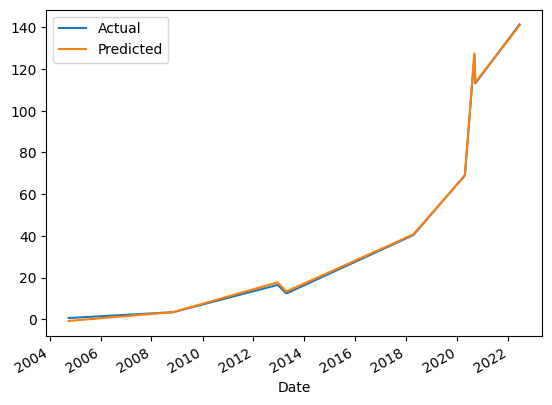

In [31]:
df_compare.plot(kind='line')
# lập biểu đồ độ để dễ đánh giá

### <font color = "green"> Ta thấy mô hình quá tốt<font>

# <font color="red">5:Lưu mô hình</font>

Ta đang triển khai mô hình trong biến model

In [32]:
import pickle
# Tải mô hình từ file
with open('../Model_data/Apple.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)